### OUTLINE

**1. Odometers, Speedometers, and Derivatives**

Understanding motion means understanding quantities like position, velocity, and acceleration and how they relate to each other. And it turns out that calculus gives us two incredible tools for understanding these relationships: <U>derivatives</U> and <U>integrals</U>.

**2. Accelerometers, Rate Gyros, and Integrals**

An inertial measurement unit is able to measure acceleration in three directions as well as rotation rates around all three axes (pitch, roll, and yaw).

**3. Two Dimensional Robot Motion and Trigonometry**

<img src='./figs/outline1.png' width=200>

Get vehicle's heading and displacement to calculate horizontal and vertical changes in its motion.

**4. LAB - Reconstructing Trajectories**

Use data to reconstruct plots of the vehicle's trajectorey.

### Navigation Sensors

* Odometers<br> 
measures how far a vehicle has traveled by counting wheel rotations
<br>

* Inertial Measurement Unit<br>
measures a vehicle's heading, rotation rate, and linear acceleration

### Defining the Derivative

> Is it possible to calculate instantaneous speed using position and time measurements? 

* Velocity is the instantaneous rate of change of position
* Velocity is the slope of the tangent line of position
* Velocity is the derivative of position

>> position difference within very small time term, which is derivative of  position gives us instantaneous speed

### Get values from data, not function equation

For a car, the speedodometer tells us the instanteneous speed and it is calculated from data, not from some equations.



In [12]:
# run this cell for required imports

from src.helpers import process_data
from matplotlib import pyplot as plt

In [13]:
def get_derivative_from_data(position_data, time_data):
    # TODO - try your best to implement this code yourself!
    #        if you get really stuck feel free to go back
    #        to the previous notebook for a hint.
    
    prev_position = position_data[0]
    prev_time = time_data[0]
    
    vel = []
    for i in range(1, len(position_data)):
        delta_t = time_data[i] - prev_time
        delta_p = position_data[i] - prev_position
        
        vel.append(delta_p/delta_t)
        
        prev_time = time_data[i]
        prev_position = position_data[i]
        
    return vel

In [14]:
# load the parallel park data
PARALLEL_PARK_DATA = process_data("./data/parallel_park.pickle")

# get the relevant columns
timestamps    = [row[0] for row in PARALLEL_PARK_DATA]
displacements = [row[1] for row in PARALLEL_PARK_DATA]

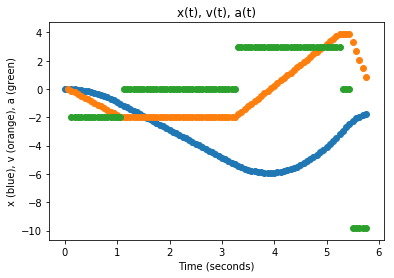

In [15]:
speeds = get_derivative_from_data(displacements, timestamps)
accelerations = get_derivative_from_data(speeds, timestamps[1:])

plt.title("x(t), v(t), a(t)")
plt.xlabel("Time (seconds)")
plt.ylabel("x (blue), v (orange), a (green)")
plt.scatter(timestamps, displacements)
plt.scatter(timestamps[1:], speeds)
plt.scatter(timestamps[2:], accelerations)
plt.show()